In [59]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42

In [60]:

dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_new.h5'

In [61]:
NUM_CLASSES = 9

In [62]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [63]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [64]:
print(len(X_dataset))
print(len(y_dataset))

4080
4080


In [65]:
print(y_dataset)
print(X_dataset.shape)

[0 0 0 ... 8 8 8]
(4080, 42)


In [66]:
train_ratio = 0.80
test_ratio = 0.20

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=1-train_ratio, random_state=RANDOM_SEED)

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [68]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [69]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 42)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                860       
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 9)                 99        
                                                                 
Total params: 1169 (4.57 KB)
Trainable params: 1169 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
hist=model.fit(X_train,y_train,epochs=500,batch_size=128,validation_data=(X_test, y_test),callbacks=[cp_callback, es_callback])

Epoch 1/500


 1/26 [>.............................] - ETA: 21s - loss: 2.3291 - accuracy: 0.0938
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier_new.h5
26/26 [==============================] - 1s 12ms/step - loss: 2.2045 - accuracy: 0.1293 - val_loss: 2.0282 - val_accuracy: 0.1201
Epoch 2/500
 1/26 [>.............................] - ETA: 0s - loss: 2.1055 - accuracy: 0.1484
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier_new.h5
26/26 [==============================] - 0s 4ms/step - loss: 2.0559 - accuracy: 0.1850 - val_loss: 1.9232 - val_accuracy: 0.2647
Epoch 3/500
 1/26 [>.............................] - ETA: 0s - loss: 2.0388 - accuracy: 0.1406
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier_new.h5
26/26 [==============================] - 0s 4ms/step - loss: 1.9690 - accuracy: 0.2270 - val_loss: 1.8230 - val_accuracy: 0.3542
Epoch 4/500
 1/26 [>.............................] - ETA: 0s - loss: 2.0004 - accuracy: 0.1719
Epoch 4: 

In [72]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\prade\AppData\Local\Temp\tmpgosglqp8\assets


INFO:tensorflow:Assets written to: C:\Users\prade\AppData\Local\Temp\tmpgosglqp8\assets


6828

CNN Error: 0.00%


C:\Users\prade\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


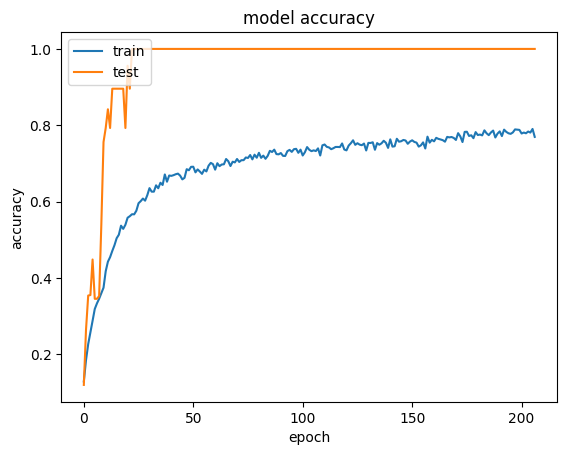

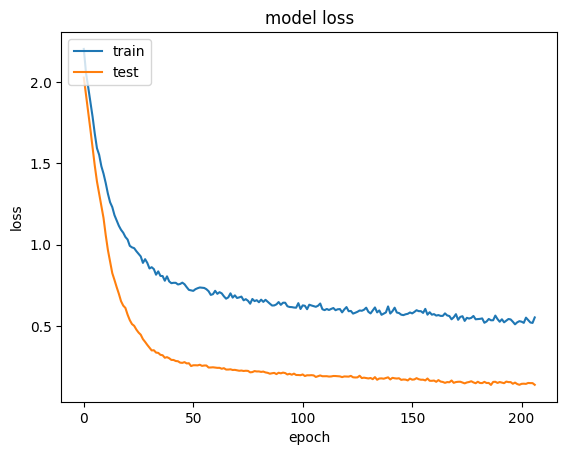

In [73]:
import matplotlib.pyplot as plt
# val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100 - scores[1] * 100))
model.save(model_save_path,include_optimizer=False)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy_graph.png')
plt.show()
# summarize history for loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_graph.png')
plt.show()